# Практическая работа 7

Подготовка к выполнению индивидуальных заданий

In [1]:
%pip install psycopg2

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import psycopg2
from psycopg2 import Error

In [3]:
try:
    # Подключение к существующей базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database="medical_db")

    # Создание курсора для выполнения операций с базой данных
    cursor = connection.cursor()
    # Вывод информации о сервере PostgreSQL
    print("Информация о сервере PostgreSQL")
    print(connection.get_dsn_parameters(), "\n")
    # Выполнение SQL-запроса
    cursor.execute("SELECT version();")
    # Получение результата
    record = cursor.fetchone()
    print("Вы подключены к - ", record, "\n")

except (Exception, Error) as error:
    print("Ошибка при подключении к PostgreSQL:", error)
finally:
    if (connection):
        cursor.close()
        connection.close()
        print("Соединение с PostgreSQL закрыто")

Информация о сервере PostgreSQL
{'user': 'postgres', 'channel_binding': 'prefer', 'dbname': 'medical_db', 'host': 'localhost', 'port': '5432', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'sslcertmode': 'allow', 'sslsni': '1', 'ssl_min_protocol_version': 'TLSv1.2', 'gssencmode': 'disable', 'krbsrvname': 'postgres', 'gssdelegation': '0', 'target_session_attrs': 'any', 'load_balance_hosts': 'disable'} 

Вы подключены к -  ('PostgreSQL 16.8, compiled by Visual C++ build 1942, 64-bit',) 

Соединение с PostgreSQL закрыто


1. Создайте таблицу "Hospital" с полями "ID", "NAME", "TYPE".

In [4]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

try:
    # Создание подключения к базе данных sql_case_bi_mgpu (база, с которой можно создавать другие базы)
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database="medical_db")
    connection.autocommit = True  # Отключаем транзакцию для команды CREATE DATABASE
    cursor = connection.cursor()

    # Создание базы данных
    #cursor.execute("CREATE DATABASE medical_db;")
    #print("База данных 'medical_db' успешно создана")

    # Закрытие текущего соединения для подключения к новой базе данных
    close_connection(connection)

    # Подключение к новой базе данных 'medical_db'
    connection = get_connection("medical_db")
    cursor = connection.cursor()

    # Создание таблицы Hospital
    create_table_query = '''
    CREATE TABLE Hospital (
        Hospital_Id serial NOT NULL PRIMARY KEY,
        Hospital_Name VARCHAR (100) NOT NULL,
        Hospital_Type VARCHAR (10)
    );
    '''
    cursor.execute(create_table_query)
    connection.commit()
    print("Таблица 'Hospital' успешно создана")

    # Вставка данных в таблицу Hospital
    insert_query = '''
    INSERT INTO Hospital (Hospital_Id, Hospital_Name, Hospital_Type)
    VALUES
    (1, 'Mayo Clinic', private),
    (2, 'Cleveland Clinic', state),
    (3, 'Johns Hopkins', state),
    (4, 'UCLA Medical Center', state);
    '''
    cursor.execute(insert_query)
    connection.commit()
    print("Данные успешно вставлены в таблицу 'Hospital'")

except (Exception, psycopg2.Error) as error:
    print("Ошибка при подключении или работе с PostgreSQL:", error)

finally:
    # Закрытие подключения к базе данных
    if connection:
        close_connection(connection)

Соединение с PostgreSQL закрыто
Таблица 'Hospital' успешно создана
Ошибка при подключении или работе с PostgreSQL: ОШИБКА:  столбец "private" не существует
LINE 4:     (1, 'Mayo Clinic', private),
                               ^

Соединение с PostgreSQL закрыто


Дополнительно загрузим данные в таблицу Doctor для выполнения последующих заданий 

In [7]:
CREATE TABLE Doctor (
    Doctor_Id serial NOT NULL PRIMARY KEY,
    Doctor_Name VARCHAR (100) NOT NULL,
    Hospital_Id serial NOT NULL,
    Joining_Date DATE NOT NULL,
    Speciality VARCHAR (100) NOT NULL,
    Salary INTEGER NOT NULL,
    Experience SMALLINT
);

-- Вставка данных о докторах
INSERT INTO Doctor (Doctor_Id, Doctor_Name, Hospital_Id, Joining_Date, Speciality, Salary, Experience)
VALUES
('101', 'David', '1', '2005-02-10', 'Pediatric', 40000, NULL),
('102', 'Michael', '1', '2018-07-23', 'Oncologist', 20000, NULL),
('103', 'Susan', '2', '2016-05-19', 'Garnacologist', 25000, NULL),
('104', 'Robert', '2', '2017-12-28', 'Pediatric', 28000, NULL),
('105', 'Linda', '3', '2004-06-04', 'Garnacologist', 42000, NULL),
('106', 'William', '3', '2012-09-11', 'Dermatologist', 30000, NULL),
('107', 'Richard', '4', '2014-08-21', 'Garnacologist', 32000, NULL),
('108', 'Karen', '4', '2011-10-17', 'Radiologist', 30000, NULL),
('109', 'James', '1', '2022-01-15', 'Cardiologist', 45000, 5),
('110', 'Emily', '1', '2023-04-10', 'Orthopedic Surgeon', 50000, 3),
('111', 'Olivia', '2', '2021-09-05', 'Neurologist', 42000, 4),
('112', 'John', '2', '2024-02-18', 'Surgeon', 60000, 2),
('113', 'Sophia', '3', '2022-07-30', 'Urologist', 38000, 6),
('114', 'Daniel', '3', '2025-03-22', 'Pulmonologist', 47000, 1),
('115', 'Isabella', '4', '2023-11-01', 'Pediatrician', 41000, 3),
('116', 'Liam', '4', '2022-05-25', 'Dermatologist', 35000, 4),
('117', 'Mia', '1', '2024-06-17', 'Gastroenterologist', 53000, 2),
('118', 'Lucas', '2', '2023-01-12', 'Anesthesiologist', 46000, 3);

SyntaxError: invalid syntax (595646471.py, line 1)

2.	Получите информацию о докторе с ID=109

In [5]:
def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")



def get_doctor_detail(doctor_id):
    try:
        # Подключаемся к базе данных medical_db
        database_name = 'medical_db'
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # Запрос для получения информации о докторе
        select_query = """SELECT * FROM Doctor WHERE Doctor_Id = %s"""
        cursor.execute(select_query, (doctor_id,))
        records = cursor.fetchall()

        # Вывод информации о докторе
        print("Печать записи о докторе:")
        for row in records:
            print("Doctor Id:", row[0])
            print("Doctor Name:", row[1])
            print("Hospital Id:", row[2])
            print("Joining Date:", row[3])
            print("Specialty:", row[4])
            print("Salary:", row[5])
            print("Experience:", row[6])

        # Закрытие подключения
        close_connection(connection)
    except (Exception, psycopg2.Error) as error:
        print("Ошибка при получении данных:", error)

get_doctor_detail(109)

Печать записи о докторе:
Doctor Id: 109
Doctor Name: James
Hospital Id: 1
Joining Date: 2022-01-15
Specialty: Cardiologist
Salary: 45000
Experience: 5
Соединение с PostgreSQL закрыто


3.	Обновите стаж врача с ID=110 на 2 года.

In [6]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

def update_experience(doctor_id, new_experience):
    try:
        # Подключаемся к базе данных
        database_name = 'medical_db'
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # Обновляем стаж доктора с указанным ID
        update_query = """UPDATE Doctor SET Experience = %s WHERE Doctor_Id = %s"""
        cursor.execute(update_query, (new_experience, doctor_id))
        connection.commit()

        print(f"Стаж врача с ID {doctor_id} успешно обновлен на {new_experience} года")

        # Печать данных о докторе после обновления
        select_query = """SELECT Doctor_Id, Doctor_Name, Hospital_Id, Joining_Date, Speciality, Salary, Experience
                          FROM Doctor WHERE Doctor_Id = %s"""
        cursor.execute(select_query, (doctor_id,))
        doctor_record = cursor.fetchone()

        if doctor_record:
            print("\nИнформация о докторе после обновления:")
            print(f"Doctor Id: {doctor_record[0]}")
            print(f"Doctor Name: {doctor_record[1]}")
            print(f"Hospital Id: {doctor_record[2]}")
            print(f"Joining Date: {doctor_record[3]}")
            print(f"Speciality: {doctor_record[4]}")
            print(f"Salary: {doctor_record[5]}")
            print(f"Experience: {doctor_record[6]}")

        # Закрытие подключения
        close_connection(connection)

    except (Exception, psycopg2.Error) as error:
        print("Ошибка при обновлении данных:", error)

# Обновим стаж врача с ID 101 на 3 года
print("Задание: Обновить стаж врачу с ID 110 на 2 года\n")
update_experience(110, 2)

Задание: Обновить стаж врачу с ID 110 на 2 года

Стаж врача с ID 110 успешно обновлен на 2 года

Информация о докторе после обновления:
Doctor Id: 110
Doctor Name: Emily
Hospital Id: 1
Joining Date: 2023-04-10
Speciality: Orthopedic Surgeon
Salary: 50000
Experience: 2
Соединение с PostgreSQL закрыто


4.	Удалите запись из таблицы "Doctor" с ID=115.

In [7]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

def delete_doctor(doctor_id):
    try:
        # Подключаемся к базе данных
        database_name = 'medical_db'
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # Удаляем запись доктора с указанным ID
        delete_query = """DELETE FROM Doctor WHERE Doctor_Id = %s"""
        cursor.execute(delete_query, (doctor_id,))
        connection.commit()

        # Проверяем, была ли запись удалена
        if cursor.rowcount > 0:
            print(f"Запись врача с ID {doctor_id} успешно удалена")
        else:
            print(f"Запись врача с ID {doctor_id} не найдена")

        # Закрытие подключения
        close_connection(connection)

    except (Exception, psycopg2.Error) as error:
        print("Ошибка при удалении данных:", error)

# Удалим запись врача с ID 115
print("Задание: Удалить запись врача с ID 115\n")
delete_doctor(115)

Задание: Удалить запись врача с ID 115

Запись врача с ID 115 успешно удалена
Соединение с PostgreSQL закрыто


Задания 5. Постройте график для анализа количества врачей по специальности.

In [8]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\damdi\AppData\Local\Temp\ipykernel_19940\1494749935.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


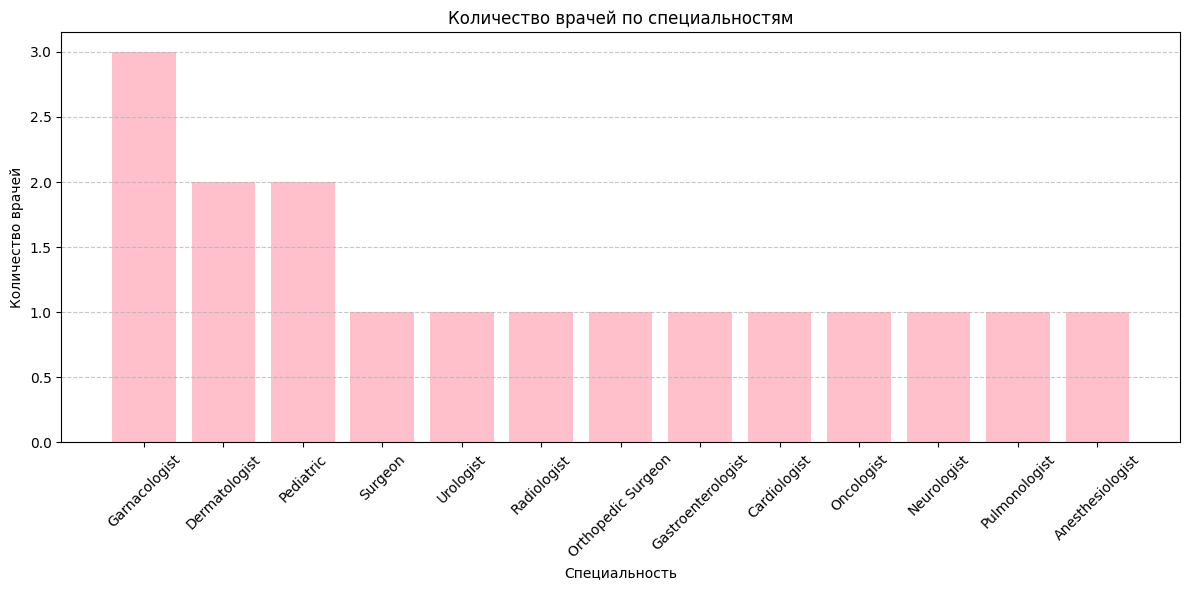

In [14]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

conn = psycopg2.connect(
    host="localhost",
    database="medical_db",
    user="postgres",
    password="1",
    port="5432"
)

query = """
SELECT speciality, COUNT(*) AS count
FROM Doctor
GROUP BY speciality;
"""

df = pd.read_sql(query, conn)

conn.close()

df_sorted = df.sort_values(by='count', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_sorted['speciality'], df_sorted['count'], color='pink')
plt.title('Количество врачей по специальностям')
plt.xlabel('Специальность')
plt.ylabel('Количество врачей')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\damdi\AppData\Local\Temp\ipykernel_8696\3761663769.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


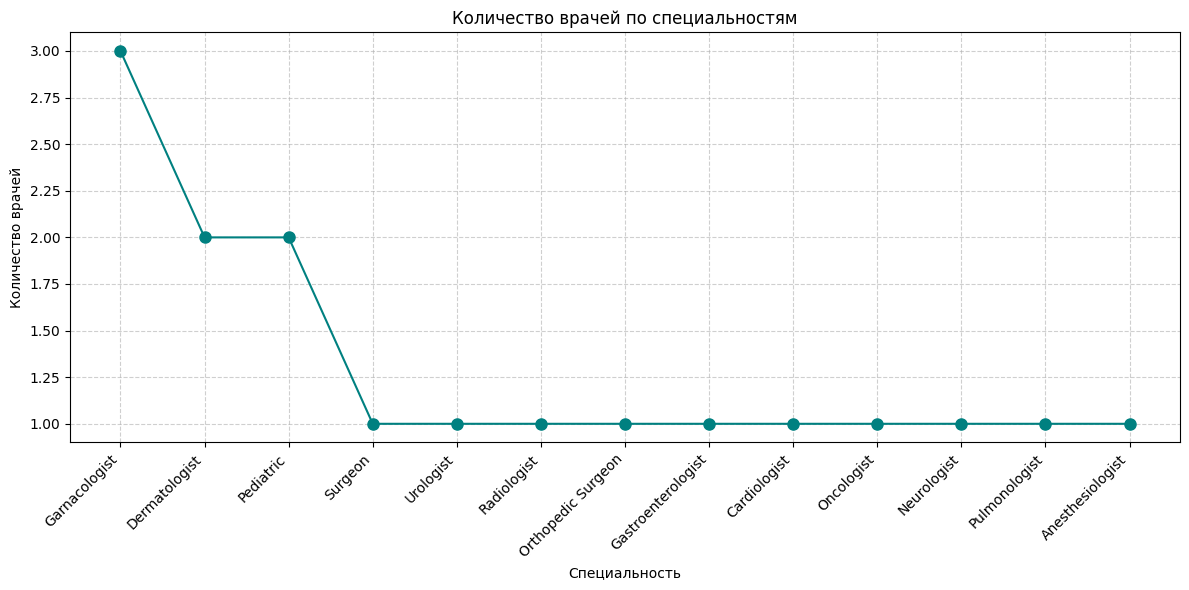

In [4]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# Подключение к базе данных
conn = psycopg2.connect(
    host="localhost",
    database="medical_db",
    user="postgres",
    password="1",
    port="5432"
)

# SQL-запрос
query = """
SELECT speciality, COUNT(*) AS count
FROM Doctor
GROUP BY speciality;
"""

# Загрузка данных
df = pd.read_sql(query, conn)
conn.close()

# Сортировка по количеству врачей
df_sorted = df.sort_values(by='count', ascending=False).reset_index(drop=True)

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['speciality'], df_sorted['count'], 
         marker='o', linestyle='-', color='teal', markersize=8)

# Настройки графика
plt.title('Количество врачей по специальностям')
plt.xlabel('Специальность')
plt.ylabel('Количество врачей')
plt.xticks(rotation=45, ha='right')  # чтобы названия специальностей не пересекались
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)

# Отображение графика
plt.show()